### The Sparks Foundation(GRIPDEC20)
#### Saksham Singh


## Task 1-Predict the percentage of an student based on the no. of study hours. using linear regression .

In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [18]:
## reading the data file using read_csv
data =pd.read_csv('../Documents/files/stu_study_hrs.csv')
data.shape ## checking for shape of data

(25, 2)

In [19]:
data.head() ## showing data file org view

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## EDA

In [20]:
data.info()
##  - the data file contains 2 columns(one of which is input var['Hours'],and other one is target value['Scores'])
##  - ['Hours'] is of float type and contains numeric data
##  - ['Scores'] is of int type and contains numeric data
##  - There are no null values in data.so no pre-processing required.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [21]:
## exploring the statistical description of data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
data.nunique()

Hours     23
Scores    23
dtype: int64

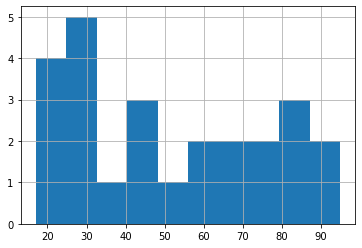

In [23]:
data.Scores.hist()

## Pre-Procesing : Not req. Data is fully cleaned to be used directly.

In [24]:
## looking at dataframe.
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##  Regression Analysis

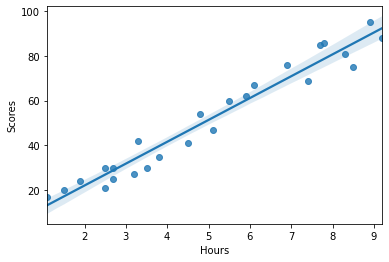

In [25]:
##  regplot() is used to plot best fitted line to see the fitting of data points  accurately.
##  a rough view to be later compared with predicted values .
sb.regplot(x=data.Hours,y=data.Scores)
## - There are no outliers here,and the datapoints are also well fitted onto line,suggesting good accuracy.Let's check

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
## Model object initialization
l_model =LinearRegression()

In [28]:
## Since there are no more features ,so no need to create test and train sets separately,we can go  without them
## Model Training
l_model.fit(data.Hours.values.reshape(-1,1),data.Scores)

LinearRegression()

In [29]:
## model prediction
y_pred =l_model.predict(data.Hours.values.reshape(-1,1))
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [30]:
## model coefficients
print(l_model.coef_)
print(l_model.intercept_)

[9.77580339]
2.483673405373196


In [31]:
## checking the accuracy
score =r2_score(data.Scores,y_pred)
mean_abs =mean_absolute_error(data.Scores,y_pred)


In [32]:
print("R2 Score :",score)
print("MAE :",mean_abs)

R2 Score : 0.9529481969048356
MAE : 4.972805319866375


In [33]:
## r2_score is coming 0.95 that suggests that model is  making accurate pred upto 95%,i.e the model is really good.
## and mae:4.97 suggest that errors are less,and datapoints are best fitted. again suggesting  that our  model is a good model.

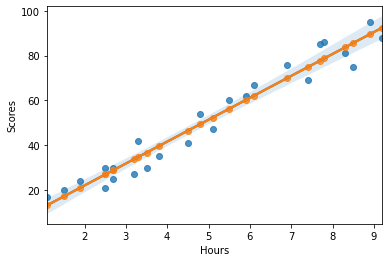

In [34]:
sb.regplot(data.Hours,data.Scores)
sb.regplot(data.Hours,y_pred)
## all the data points are best fitted and the reg_fit line is coinciding with the actual line.  

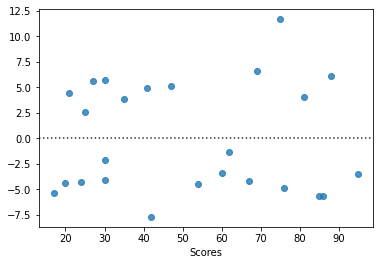

In [35]:
## checking the residplot() to confirm the residuals in our model 
sb.residplot(data.Scores,y_pred)
## the residplot line is straight .giving yu more accuracy.

In [44]:
## suppose we wanna get how much percentage is a student going to score,if he studies for 8 hrs
pred_score_1 =l_model.predict(np.array([8.0]).reshape(-1,1))
print(pred_score_1)
pred_score_2 =l_model.predict(np.array([5.0]).reshape(-1,1))
print(pred_score_2)
pred_score_3 =l_model.predict(np.array([15.0]).reshape(-1,1))
print(pred_score_3)

[80.69010053]
[51.36269036]
[149.12072427]


### Since there has been a positive corelation b/w the feature and target var,
     we can see that the more no.of hours  a stu studies,the more is he going to score.